# Neural Network modelling

In this notebook we are going to build neural network models on our full dataset and small size datasets. For the full size dataset we will build two models. One where we do not pay attention to class imbalance and one where we do. For the small size dataset where we have not manually balanced the data, we will create two models with the same procedure as with the full size dataset. However, with the manually balanced small dataset we will create the model without using the parameter class_weight. In this way, we can compare whether it works best to manually balance the dataset or use the built in parameter class_weight in a Neural network.

# Libraries

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score, make_scorer, mean_squared_error, confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

## Neural Network on the full size dataset

## Loading and splittig the data

In [13]:
df_full_size = pd.read_csv('/content/drive/MyDrive/BDA final project/data-full-size.csv')
df_full_size

,Unnamed: 0,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,0,1,1,44,1,0,1,40454.0,217,1,...,0,0,0,0,0,0,0,0,0,1
1,1,2,1,76,1,0,0,33536.0,183,0,...,0,0,0,0,0,0,0,1,0,0
2,2,3,1,47,1,0,1,38294.0,27,1,...,0,0,0,0,0,0,0,0,0,1
3,3,4,1,21,1,1,0,28619.0,203,0,...,0,0,0,0,0,0,0,0,1,0
4,4,5,0,29,1,1,0,27496.0,39,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381104,381105,1,74,1,1,0,30170.0,88,0,...,0,0,0,0,0,0,0,1,0,0
381105,381105,381106,1,30,1,1,0,40016.0,131,0,...,0,0,0,0,0,0,0,0,1,0
381106,381106,381107,1,21,1,1,0,35118.0,161,0,...,0,0,0,0,0,1,0,0,1,0
381107,381107,381108,0,68,1,0,1,44617.0,74,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
df_full_size = df_full_size.iloc[:,2:]
df_full_size.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,1,0,1,40454.0,217,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,76,1,0,0,33536.0,183,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,47,1,0,1,38294.0,27,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,21,1,1,0,28619.0,203,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,29,1,1,0,27496.0,39,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
df_full_size['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [16]:
X = df_full_size.drop('Response', axis = 1)
y = df_full_size['Response']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12)

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(285831, 218)
(285831,)
(95278, 218)
(95278,)


In [19]:
scaled_features = ['Age', 'Annual_Premium', 'Vintage']
ct = ColumnTransformer([('scaling', StandardScaler(), scaled_features)], remainder = 'passthrough')

In [20]:
X_train_scaled = ct.fit_transform(X_train)
X_test_scaled = ct.transform(X_test)

In [21]:
#Example of scaled feature
X_train_scaled[0][0]

-0.2454985995712122

In [22]:
print(X_train_scaled.shape)
print(y_train.shape)
print(X_test_scaled.shape)
print(y_test.shape)

(285831, 218)
(285831,)
(95278, 218)
(95278,)


In [23]:
#Number of features
X.shape[1]

218

### Constructing the models and tuning

In [62]:
def design_model(modelname):
  modelname = Sequential(name=modelname)

  input = layers.InputLayer(input_shape = X.shape[1])
  modelname.add(input)
  modelname.add(layers.Dense(72, activation='relu'))
  modelname.add(layers.Dropout(0.2))
  modelname.add(layers.Dense(32, activation='relu'))
  modelname.add(layers.Dropout(0.1))
  modelname.add(layers.Dense(32, activation='relu'))
  modelname.add(layers.Dropout(0.1))
  modelname.add(layers.Dense(1, activation='sigmoid'))

  return modelname

In [64]:
network_full_size = design_model('network_full_size')
network_full_size.summary()

Model: "network_full_size"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 72)                15768     
                                                                 
 dropout_24 (Dropout)        (None, 72)                0         
                                                                 
 dense_33 (Dense)            (None, 32)                2336      
                                                                 
 dropout_25 (Dropout)        (None, 32)                0         
                                                                 
 dense_34 (Dense)            (None, 32)                1056      
                                                                 
 dropout_26 (Dropout)        (None, 32)                0         
                                                                 
 dense_35 (Dense)            (None, 1)           

In [86]:
network_full_size.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [87]:
es = EarlyStopping(monitor='accuracy', patience = 4)
network_full_size_history = network_full_size.fit(X_train_scaled, y_train, validation_split = 0.1, epochs = 70, callbacks = [es])

Epoch 1/70
8039/8039 [==============================] - 39s 5ms/step - loss: 0.2605 - accuracy: 0.8784 - val_loss: 0.2671 - val_accuracy: 0.8770
Epoch 2/70
8039/8039 [==============================] - 37s 5ms/step - loss: 0.2603 - accuracy: 0.8786 - val_loss: 0.2683 - val_accuracy: 0.8765
Epoch 3/70
8039/8039 [==============================] - 37s 5ms/step - loss: 0.2601 - accuracy: 0.8788 - val_loss: 0.2677 - val_accuracy: 0.8774
Epoch 4/70
8039/8039 [==============================] - 36s 5ms/step - loss: 0.2604 - accuracy: 0.8787 - val_loss: 0.2684 - val_accuracy: 0.8764
Epoch 5/70
8039/8039 [==============================] - 37s 5ms/step - loss: 0.2604 - accuracy: 0.8788 - val_loss: 0.2673 - val_accuracy: 0.8767
Epoch 6/70
8039/8039 [==============================] - 37s 5ms/step - loss: 0.2600 - accuracy: 0.8787 - val_loss: 0.2673 - val_accuracy: 0.8781
Epoch 7/70
8039/8039 [==============================] - 37s 5ms/step - loss: 0.2602 - accuracy: 0.8786 - val_loss: 0.2677 - val_ac

[Working with imbalanced data in Keras](https://keras.io/examples/structured_data/imbalanced_classification/)

In [70]:
counts = np.bincount(y_train)
weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]
class_weight_full_size = {0: weight_for_0, 1: weight_for_1}
print('Weight for 0(Not interested) {:.10f}, weight for 1(Interested) {:.10f}'.format(weight_for_0, weight_for_1))

Weight for 0(Not interested) 0.0000039886, weight for 1(Interested) 0.0000284746


In [71]:
print("Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(y_train)))

Number of positive samples in training data: 35119 (12.29% of total)


In [72]:
network_full_size_balanced = design_model('network_full_size_balanced')

In [73]:
network_full_size_balanced.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [74]:
history_network_full_size_balanced = network_full_size_balanced.fit(X_train_scaled, 
                             y_train, 
                             validation_split = 0.1, 
                             epochs = 70, 
                             callbacks = [es], 
                             class_weight = class_weight_full_size)

Epoch 1/70
8039/8039 [==============================] - 41s 5ms/step - loss: 3.1359e-06 - accuracy: 0.6789 - val_loss: 0.4810 - val_accuracy: 0.6827
Epoch 2/70
8039/8039 [==============================] - 40s 5ms/step - loss: 2.9900e-06 - accuracy: 0.6960 - val_loss: 0.4521 - val_accuracy: 0.6990
Epoch 3/70
8039/8039 [==============================] - 40s 5ms/step - loss: 2.9778e-06 - accuracy: 0.6979 - val_loss: 0.4791 - val_accuracy: 0.6942
Epoch 4/70
8039/8039 [==============================] - 39s 5ms/step - loss: 2.9693e-06 - accuracy: 0.6993 - val_loss: 0.4718 - val_accuracy: 0.6889
Epoch 5/70
8039/8039 [==============================] - 39s 5ms/step - loss: 2.9604e-06 - accuracy: 0.7002 - val_loss: 0.4795 - val_accuracy: 0.6695
Epoch 6/70
8039/8039 [==============================] - 38s 5ms/step - loss: 2.9577e-06 - accuracy: 0.6999 - val_loss: 0.4556 - val_accuracy: 0.7127
Epoch 7/70
8039/8039 [==============================] - 39s 5ms/step - loss: 2.9532e-06 - accuracy: 0.7028

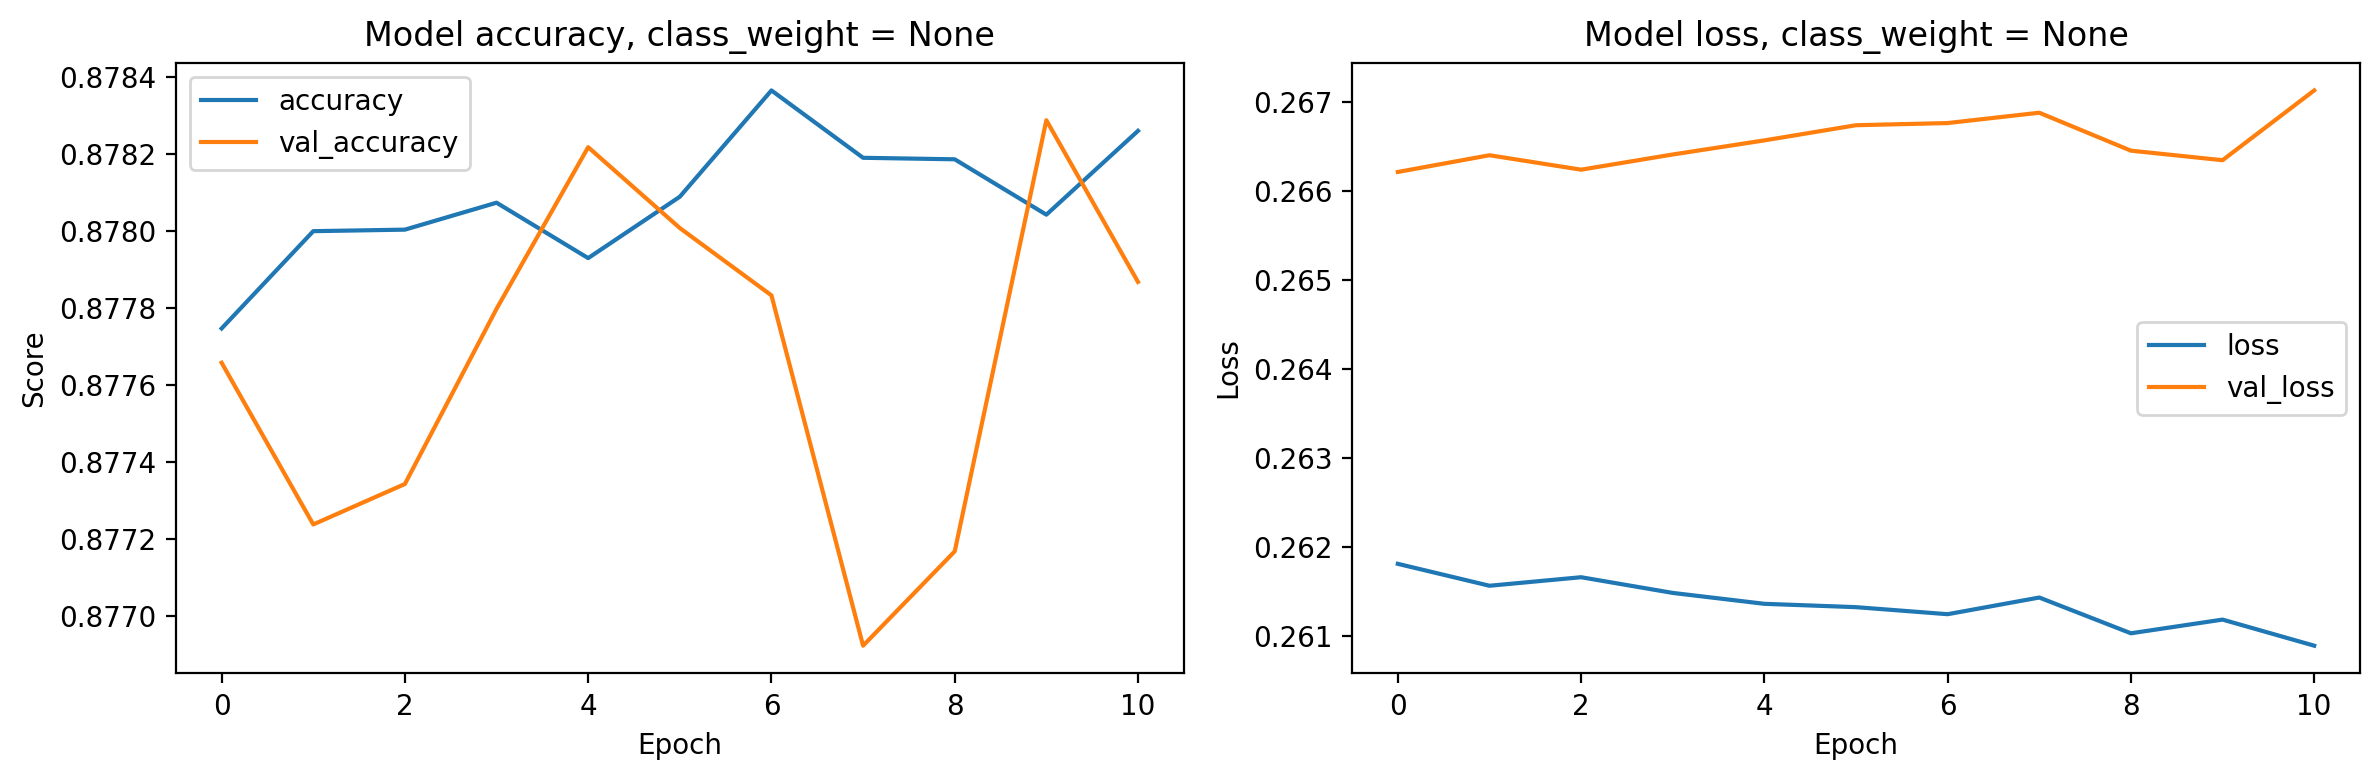

In [75]:
fig, ax = plt.subplots(1,2, figsize = (12,4), dpi = 200)
ax[0].plot(network_full_size_history.history['accuracy'], label = 'accuracy')
ax[0].plot(network_full_size_history.history['val_accuracy'], label = 'val_accuracy')
ax[0].set(title = 'Model accuracy, class_weight = None', xlabel = 'Epoch', ylabel = 'Score')
ax[0].legend()

ax[1].plot(network_full_size_history.history['loss'], label = 'loss')
ax[1].plot(network_full_size_history.history['val_loss'], label = 'val_loss')
ax[1].set(title = 'Model loss, class_weight = None', xlabel = 'Epoch', ylabel = 'Loss')
ax[1].legend()

plt.tight_layout()
plt.show()

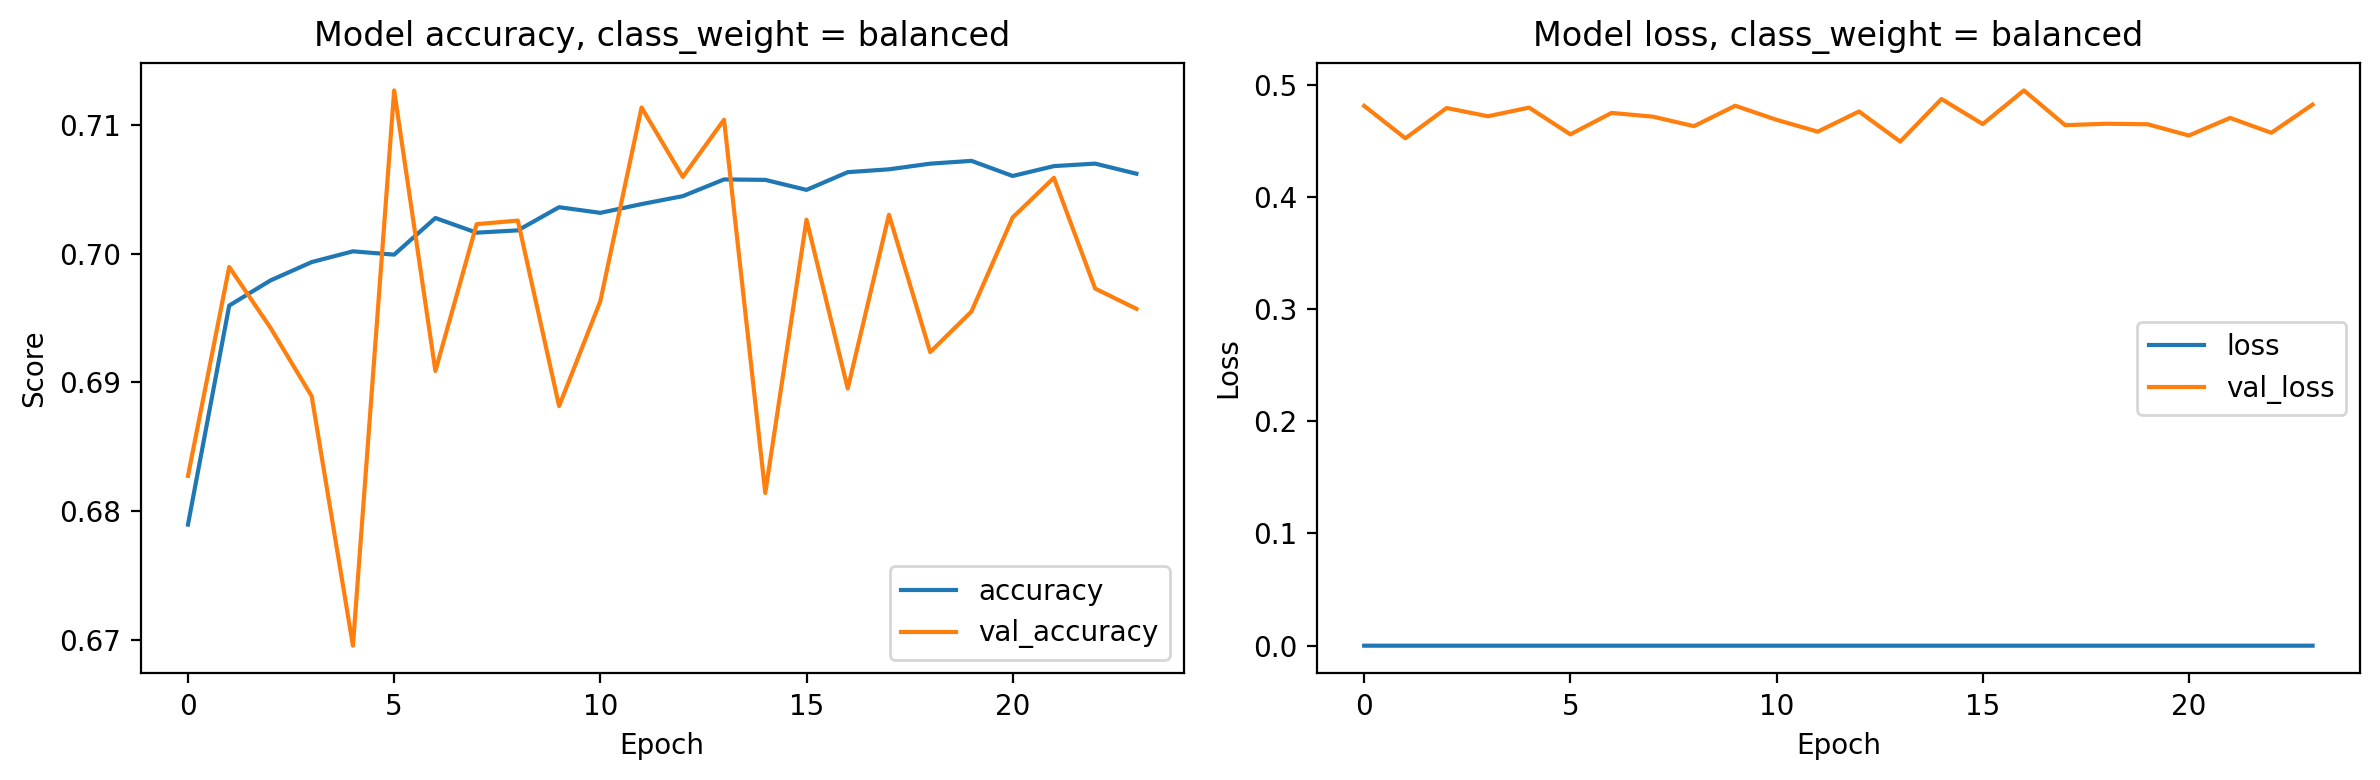

In [76]:
fig, ax = plt.subplots(1,2, figsize = (12,4), dpi = 200)
ax[0].plot(history_network_full_size_balanced.history['accuracy'], label = 'accuracy')
ax[0].plot(history_network_full_size_balanced.history['val_accuracy'], label = 'val_accuracy')
ax[0].set(title = 'Model accuracy, class_weight = balanced', xlabel = 'Epoch', ylabel = 'Score')
ax[0].legend()

ax[1].plot(history_network_full_size_balanced.history['loss'], label = 'loss')
ax[1].plot(history_network_full_size_balanced.history['val_loss'], label = 'val_loss')
ax[1].set(title = 'Model loss, class_weight = balanced', xlabel = 'Epoch', ylabel = 'Loss')
ax[1].legend()

plt.tight_layout()
plt.show()

### Evaluating the models

#### Model without class_weights

In [78]:
test_loss, test_acc = network_full_size.evaluate(X_test_scaled, y_test, verbose = 2)
print('Test Accuracy: {:.2%}'.format(test_acc))

2978/2978 - 11s - loss: 0.2660 - accuracy: 0.8775 - 11s/epoch - 4ms/step
Test Accuracy: 87.75%


In [89]:
y_pred = network_full_size.predict(X_test_scaled)
threshold = 0.5
y_pred = np.where(y_pred > threshold, 1,0)

In [90]:
confusion_matrix(y_test, y_pred)

array([[83261,   426],
       [11268,   323]])

In [91]:
print(classification_report(y_test, y_pred, target_names = ['Not interested', 'Interested']))

                precision    recall  f1-score   support

Not interested       0.88      0.99      0.93     83687
    Interested       0.43      0.03      0.05     11591

      accuracy                           0.88     95278
     macro avg       0.66      0.51      0.49     95278
  weighted avg       0.83      0.88      0.83     95278



Model with class_weights

In [92]:
test_loss, test_acc = network_full_size_balanced.evaluate(X_test_scaled, y_test, verbose = 2)
print('Test Accuracy: {:.2%}'.format(test_acc))

2978/2978 - 9s - loss: 0.4823 - accuracy: 0.6963 - 9s/epoch - 3ms/step
Test Accuracy: 69.63%


In [93]:
y_pred = network_full_size_balanced.predict(X_test_scaled)
threshold = 0.5
y_pred = np.where(y_pred > threshold, 1,0)

In [94]:
confusion_matrix(y_test, y_pred)

array([[55485, 28202],
       [  731, 10860]])

In [95]:
print(classification_report(y_test, y_pred, target_names = ['Not interested', 'Interested']))

                precision    recall  f1-score   support

Not interested       0.99      0.66      0.79     83687
    Interested       0.28      0.94      0.43     11591

      accuracy                           0.70     95278
     macro avg       0.63      0.80      0.61     95278
  weighted avg       0.90      0.70      0.75     95278



## Neural Network on the small size dataset

In [179]:
df_small = pd.read_csv('/content/drive/MyDrive/BDA final project/data-small-size.csv')
df_small.head()

,Unnamed: 0,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,35377,35378,1,58,1,0,1,22811.0,29,0,...,0,0,0,0,0,0,0,1,0,0
1,19830,19831,1,21,1,0,1,33282.0,159,0,...,0,0,0,0,0,1,0,0,1,0
2,128911,128912,1,23,1,0,1,39853.0,213,0,...,0,0,0,0,0,0,0,0,1,0
3,120005,120006,1,20,1,0,0,29252.0,146,0,...,0,0,0,0,0,1,0,0,1,0
4,180819,180820,0,63,1,0,1,45202.0,196,0,...,0,0,0,0,0,0,0,1,0,0


In [180]:
df_small = df_small.iloc[:,2:]
df_small.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,58,1,0,1,22811.0,29,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,21,1,0,1,33282.0,159,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,23,1,0,1,39853.0,213,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,20,1,0,0,29252.0,146,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,63,1,0,1,45202.0,196,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [181]:
df_small['Response'].value_counts()

0    50146
1     7020
Name: Response, dtype: int64

In [182]:
X = df_small.drop('Response', axis = 1)
y = df_small['Response']

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12)

In [184]:
scaled_features = ['Age', 'Annual_Premium', 'Vintage']
ct = ColumnTransformer([('scaling', StandardScaler(), scaled_features)], remainder = 'passthrough')

In [185]:
X_train_scaled = ct.fit_transform(X_train)
X_test_scaled = ct.transform(X_test)

In [186]:
print(X_train_scaled.shape)
print(y_train.shape)
print(X_test_scaled.shape)
print(y_test.shape)

(42874, 218)
(42874,)
(14292, 218)
(14292,)


### Constructing the models

In [187]:
network_small_size = design_model('network_small_size')
network_small_size.summary()

Model: "network_small_size"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 72)                15768     
                                                                 
 dropout_54 (Dropout)        (None, 72)                0         
                                                                 
 dense_73 (Dense)            (None, 32)                2336      
                                                                 
 dropout_55 (Dropout)        (None, 32)                0         
                                                                 
 dense_74 (Dense)            (None, 32)                1056      
                                                                 
 dropout_56 (Dropout)        (None, 32)                0         
                                                                 
 dense_75 (Dense)            (None, 1)          

In [194]:
network_small_size.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [195]:
history_network_small_size = network_small_size.fit(X_train_scaled, 
                             y_train, 
                             validation_split = 0.1, 
                             epochs = 70, 
                             callbacks = [es])

Epoch 1/70
1206/1206 [==============================] - 6s 5ms/step - loss: 0.2876 - accuracy: 0.8757 - val_loss: 0.2713 - val_accuracy: 0.8731
Epoch 2/70
1206/1206 [==============================] - 6s 5ms/step - loss: 0.2729 - accuracy: 0.8766 - val_loss: 0.2710 - val_accuracy: 0.8731
Epoch 3/70
1206/1206 [==============================] - 6s 5ms/step - loss: 0.2706 - accuracy: 0.8766 - val_loss: 0.2712 - val_accuracy: 0.8731
Epoch 4/70
1206/1206 [==============================] - 6s 5ms/step - loss: 0.2689 - accuracy: 0.8766 - val_loss: 0.2738 - val_accuracy: 0.8731
Epoch 5/70
1206/1206 [==============================] - 6s 5ms/step - loss: 0.2682 - accuracy: 0.8766 - val_loss: 0.2729 - val_accuracy: 0.8731
Epoch 6/70
1206/1206 [==============================] - 6s 5ms/step - loss: 0.2674 - accuracy: 0.8765 - val_loss: 0.2721 - val_accuracy: 0.8731
Epoch 7/70
1206/1206 [==============================] - 6s 5ms/step - loss: 0.2653 - accuracy: 0.8766 - val_loss: 0.2720 - val_accuracy:

In [196]:
network_small_size_balanced = design_model('network_small_size_balanced')
network_small_size_balanced.summary()

Model: "network_small_size_balanced"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 72)                15768     
                                                                 
 dropout_60 (Dropout)        (None, 72)                0         
                                                                 
 dense_81 (Dense)            (None, 32)                2336      
                                                                 
 dropout_61 (Dropout)        (None, 32)                0         
                                                                 
 dense_82 (Dense)            (None, 32)                1056      
                                                                 
 dropout_62 (Dropout)        (None, 32)                0         
                                                                 
 dense_83 (Dense)            (None, 1) 

In [220]:
network_small_size_balanced.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy', 'Recall'])

In [221]:
counts_small_size = np.bincount(y_train)
weight_for_0 = 1.0 / counts_small_size[0]
weight_for_1 = 1.0 / counts_small_size[1]
class_weight_small_size = {0: weight_for_0, 1: weight_for_1}
print('Weight for 0(Not interested) {:.10f}, weight for 1(Interested) {:.10f}'.format(weight_for_0, weight_for_1))

Weight for 0(Not interested) 0.0000266177, weight for 1(Interested) 0.0001885014


In [222]:
print("Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts_small_size[1], 100 * float(counts_small_size[1]) / len(y_train)))

Number of positive samples in training data: 5305 (12.37% of total)


In [223]:
network_small_size_balanced_history = network_small_size_balanced.fit(X_train_scaled, 
                             y_train, 
                             validation_split = 0.1, 
                             epochs = 70, 
                             callbacks = [es], 
                             class_weight = class_weight_small_size)

Epoch 1/70
1206/1206 [==============================] - 10s 7ms/step - loss: 1.7985e-05 - accuracy: 0.7312 - recall: 0.9431 - val_loss: 0.4875 - val_accuracy: 0.7034 - val_recall: 0.9228
Epoch 2/70
1206/1206 [==============================] - 7s 6ms/step - loss: 1.8106e-05 - accuracy: 0.7260 - recall: 0.9443 - val_loss: 0.4389 - val_accuracy: 0.7390 - val_recall: 0.8419
Epoch 3/70
1206/1206 [==============================] - 8s 6ms/step - loss: 1.7928e-05 - accuracy: 0.7330 - recall: 0.9385 - val_loss: 0.4655 - val_accuracy: 0.7171 - val_recall: 0.8842
Epoch 4/70
1206/1206 [==============================] - 7s 6ms/step - loss: 1.8015e-05 - accuracy: 0.7319 - recall: 0.9441 - val_loss: 0.4768 - val_accuracy: 0.7115 - val_recall: 0.9099
Epoch 5/70
1206/1206 [==============================] - 8s 6ms/step - loss: 1.7863e-05 - accuracy: 0.7326 - recall: 0.9458 - val_loss: 0.4906 - val_accuracy: 0.7031 - val_recall: 0.9173
Epoch 6/70
1206/1206 [==============================] - 7s 6ms/step -

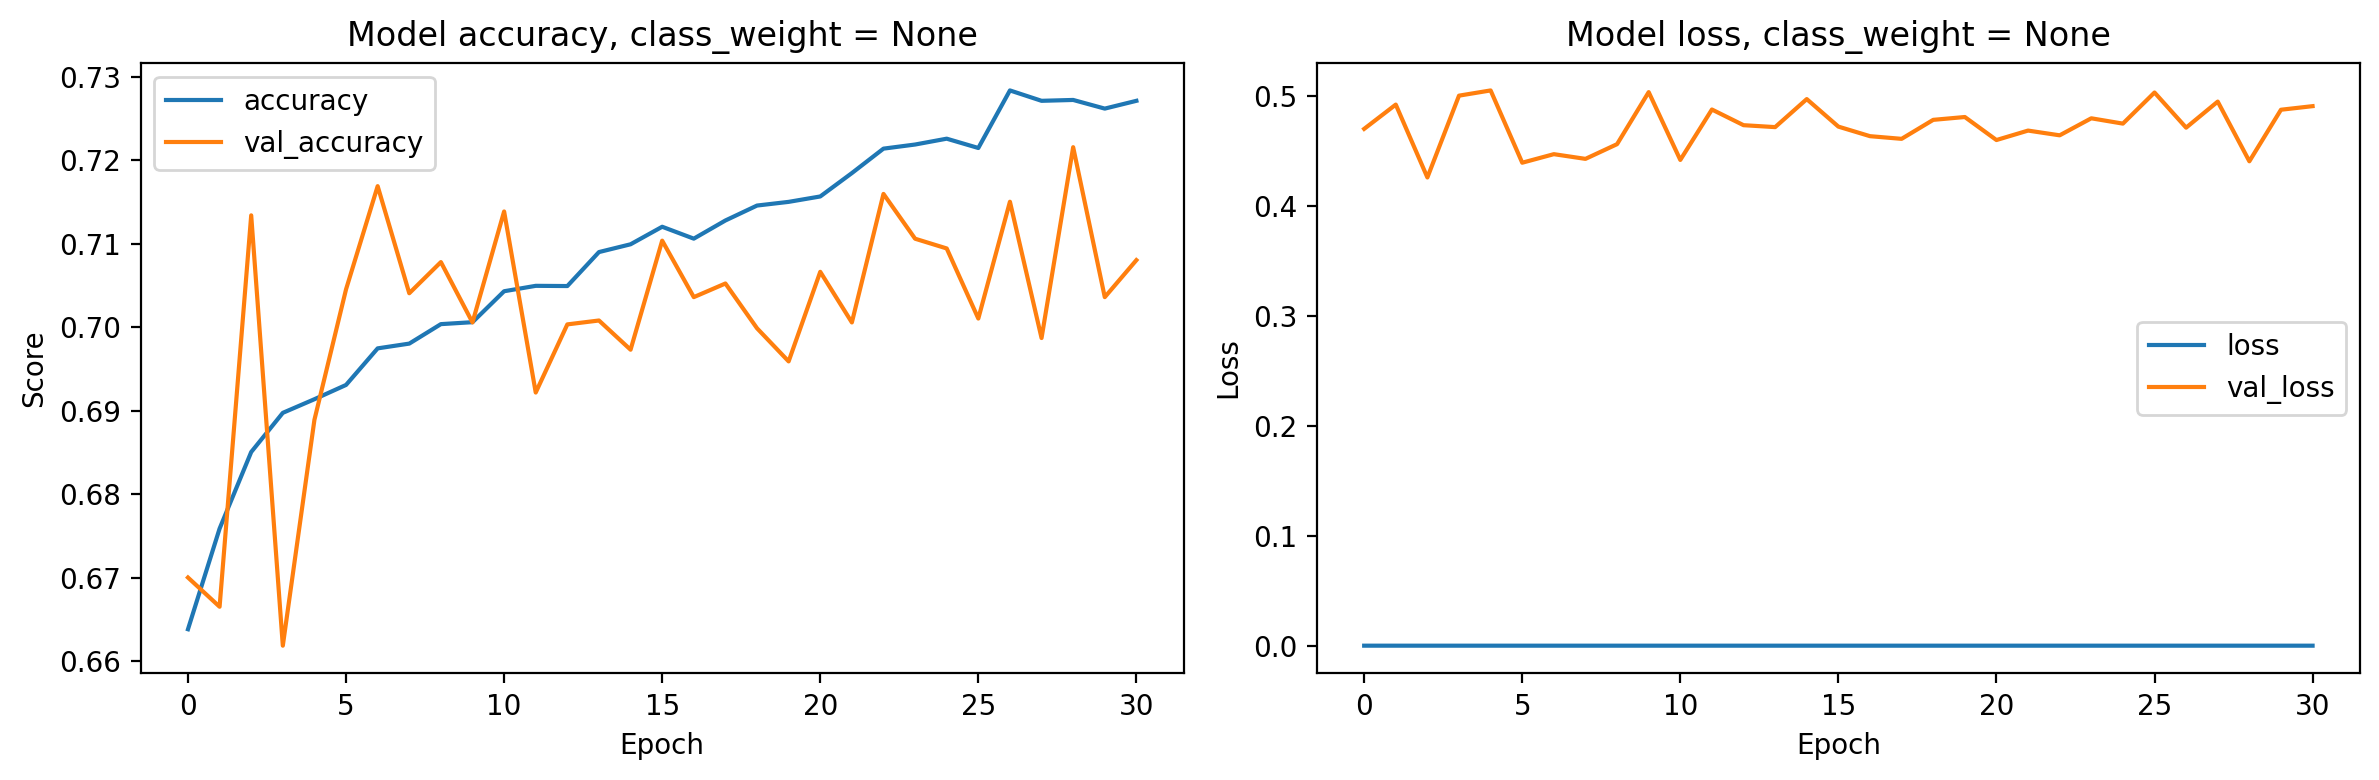

In [201]:
fig, ax = plt.subplots(1,2, figsize = (12,4), dpi = 200)
ax[0].plot(network_small_size_balanced_history.history['accuracy'], label = 'accuracy')
ax[0].plot(network_small_size_balanced_history.history['val_accuracy'], label = 'val_accuracy')
ax[0].set(title = 'Model accuracy, class_weight = None', xlabel = 'Epoch', ylabel = 'Score')
ax[0].legend()

ax[1].plot(network_small_size_balanced_history.history['loss'], label = 'loss')
ax[1].plot(network_small_size_balanced_history.history['val_loss'], label = 'val_loss')
ax[1].set(title = 'Model loss, class_weight = None', xlabel = 'Epoch', ylabel = 'Loss')
ax[1].legend()

plt.tight_layout()
plt.show()

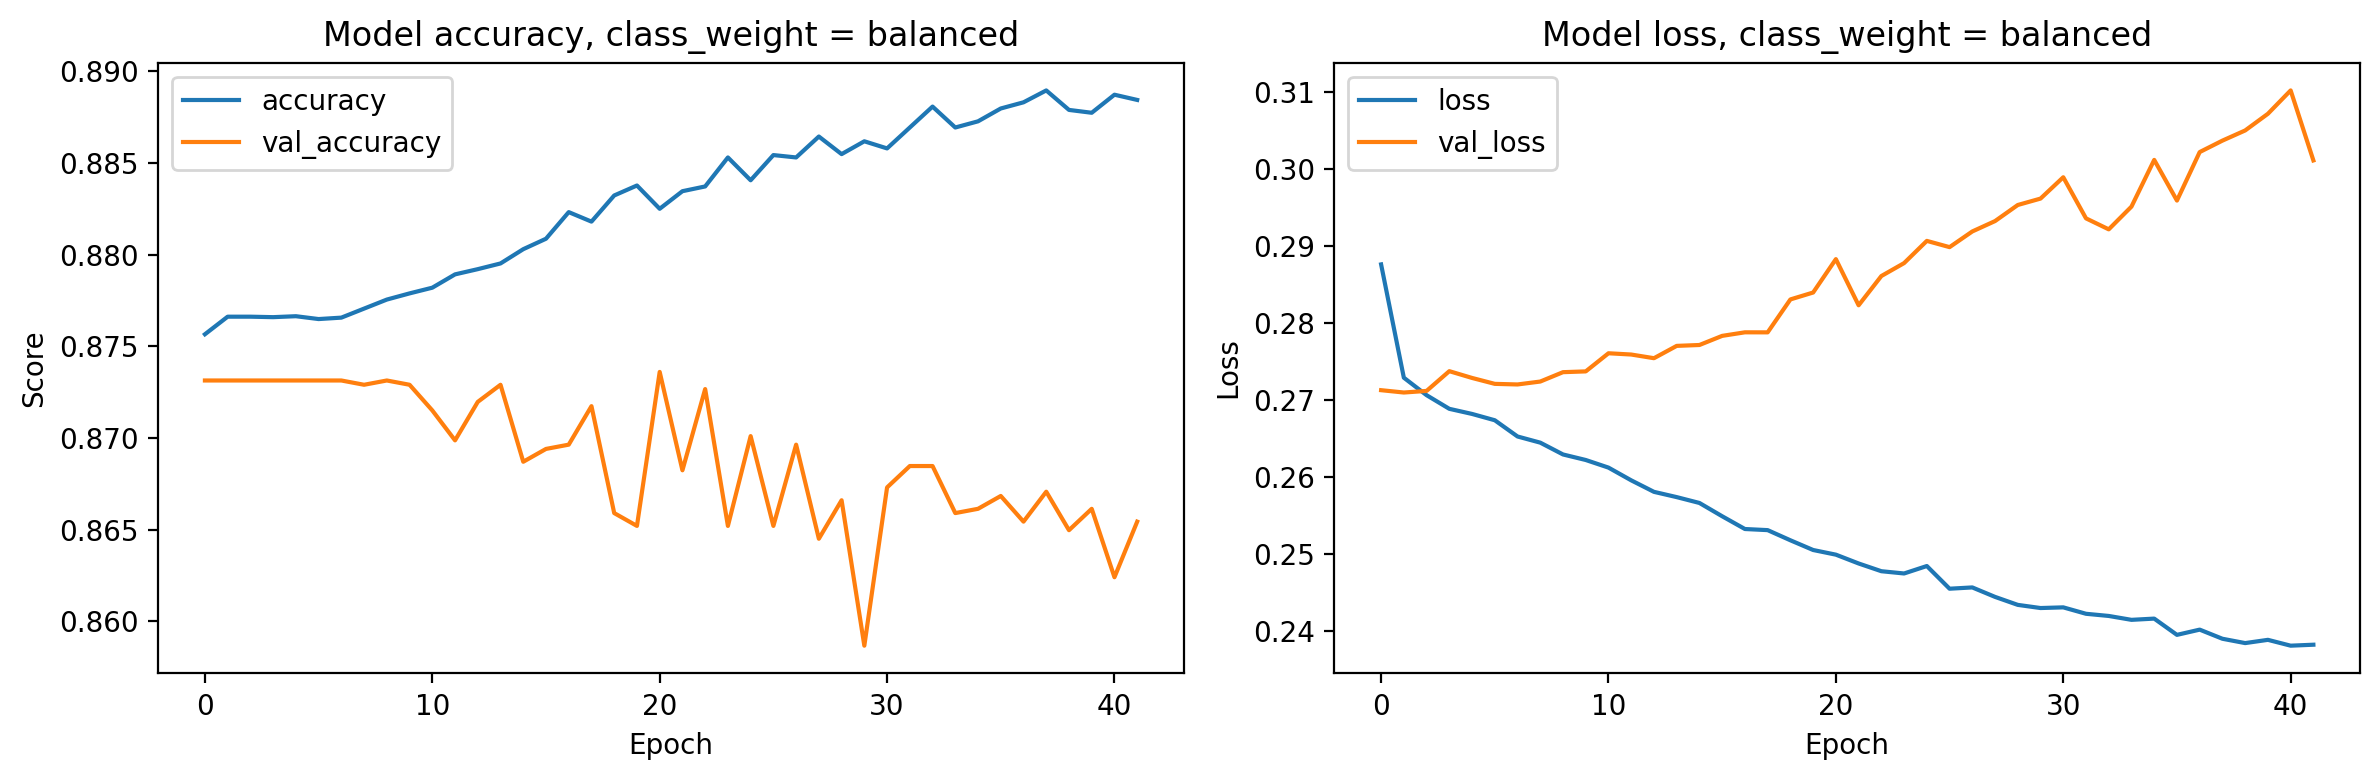

In [202]:
fig, ax = plt.subplots(1,2, figsize = (12,4), dpi = 200)
ax[0].plot(history_network_small_size.history['accuracy'], label = 'accuracy')
ax[0].plot(history_network_small_size.history['val_accuracy'], label = 'val_accuracy')
ax[0].set(title = 'Model accuracy, class_weight = balanced', xlabel = 'Epoch', ylabel = 'Score')
ax[0].legend()

ax[1].plot(history_network_small_size.history['loss'], label = 'loss')
ax[1].plot(history_network_small_size.history['val_loss'], label = 'val_loss')
ax[1].set(title = 'Model loss, class_weight = balanced', xlabel = 'Epoch', ylabel = 'Loss')
ax[1].legend()

plt.tight_layout()
plt.show()

### Evaluating the models

#### Model without class_weights

In [214]:
test_loss, test_acc = network_small_size.evaluate(X_test_scaled, y_test, verbose = 2)
print('Test Accuracy: {:.2%}'.format(test_acc))

447/447 - 1s - loss: 0.2951 - accuracy: 0.8740 - 1s/epoch - 3ms/step
Test Accuracy: 87.40%


In [215]:
def convert_y_pred_classes(y_pred, threshold):
  y_pred = np.where(y_pred > threshold, 1,0)
  return y_pred

In [216]:
y_pred = network_small_size.predict(X_test_scaled)
y_pred = convert_y_pred_classes(y_pred, 0.5)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [217]:
confusion_matrix(y_test, y_pred)

array([[12335,   242],
       [ 1559,   156]])

In [218]:
print(classification_report(y_test, y_pred, target_names = ['Not interested', 'Interested']))

                precision    recall  f1-score   support

Not interested       0.89      0.98      0.93     12577
    Interested       0.39      0.09      0.15      1715

      accuracy                           0.87     14292
     macro avg       0.64      0.54      0.54     14292
  weighted avg       0.83      0.87      0.84     14292



#### Model with class_weights

In [228]:
test_loss, test_acc, recall = network_small_size_balanced.evaluate(X_test_scaled, y_test, verbose = 2)
print('Test Accuracy: {:.2%}'.format(test_acc))
print('Recall: {}'.format(recall))

447/447 - 2s - loss: 0.5035 - accuracy: 0.7013 - recall: 0.9009 - 2s/epoch - 4ms/step
Test Accuracy: 70.13%
Recall: 0.9008746147155762


In [229]:
y_pred = network_small_size_balanced.predict(X_test_scaled)
y_pred = convert_y_pred_classes(y_pred, 0.5)
y_pred

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [230]:
confusion_matrix(y_test, y_pred)

array([[8478, 4099],
       [ 170, 1545]])

In [231]:
print(classification_report(y_test, y_pred, target_names = ['Not interested', 'Interested']))

                precision    recall  f1-score   support

Not interested       0.98      0.67      0.80     12577
    Interested       0.27      0.90      0.42      1715

      accuracy                           0.70     14292
     macro avg       0.63      0.79      0.61     14292
  weighted avg       0.90      0.70      0.75     14292

